# **Harmonizing Hit Predictions: Leveraging Audio Features to Forecast Spotify's Top Songs**

Link to the colab: https://colab.research.google.com/drive/17shSZtfZwrFMzsSofDNQWH9G_cW_xOcv?usp=sharing

Project by: Team 05
* Dylan Kakkanad
* Priyanka Chaudhari
* Saachi Dholakia
* Sahasra Konkala

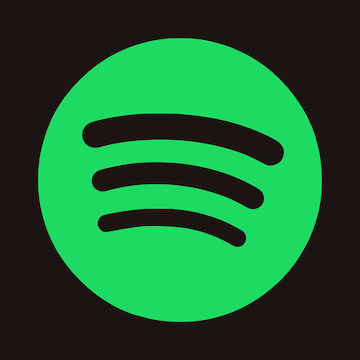

>[Harmonizing Hit Predictions: Leveraging Audio Features to Forecast Spotify's Top Songs](#scrollTo=HEtCVOtjokRk)

>>[1. Problem Statement](#scrollTo=97_7G0X1iw7m)

>>[2. Executive Summary](#scrollTo=UkXkyZF4j-xf)

>>[3. Importance of the Problem](#scrollTo=0zxrKAwVkQb4)

>>[4. Data Description](#scrollTo=JIW29Zl8kign)

>>[5. Importing Libraries](#scrollTo=ugSFB-zTg6OZ)

>>>[5.1 Libraries](#scrollTo=Vj_udEVZPzqv)

>>>[5.2 Mounting Google Drive](#scrollTo=GXirALmePtdd)

>>[6. Understanding the Spotify Dataset:](#scrollTo=x6rwUXpFRnYh)

>>[7. Data collection through Spotify API:](#scrollTo=cMzrB49WhH1E)

>>[8. Exploring the playlist:](#scrollTo=HUp0c5vDhQvK)

>>>[8.1 Checking the popularity tracks distribution in the playlist #13:](#scrollTo=pqiSSBKrhbrz)

>>[9. Merging Spotify Dataset and 13 Playlist:](#scrollTo=ycAuowzyhqOL)

>>>[9.1 Cleaning the Merged Dataset](#scrollTo=7i4VwqIvVpN0)

>>[10. Analysis of Merged Data](#scrollTo=GGdejp7ebf7O)

>>>[10.1 Correlation Matrix:](#scrollTo=thOxo07Th-Qg)

>>[11. Preprocessing Pipeline:](#scrollTo=J6XIsGYafoX0)

>>>[11.1 Transforming numeric and categorical variables](#scrollTo=vqOVQa6hp0LO)

>>>[11.2 Feature Selection](#scrollTo=NW_jWjb9p_x-)

>>[12. Models](#scrollTo=qH6gLsdOime0)

>>>[12.1 Random Forest Classifier](#scrollTo=LIR53Xb3kPJB)

>>>>[12.1.1 Halving Random Search](#scrollTo=cVxi0SkPoPhA)

>>>>[12.1.2 Halving Grid Search](#scrollTo=iCIIQkjkodLf)

>>>[12.2 K Nearest Neighbour](#scrollTo=G9m14Cvf-RF6)

>>>>[12.2.1 Halving Grid Search](#scrollTo=N_us3xIsomf9)

>>>>[12.2.2 Grid Search](#scrollTo=hEWK2Lzr-ZHS)

>>>>[12.2.3 Random Search](#scrollTo=fs9QV4zR-mDi)

>>>[12.3 Logistic Regression](#scrollTo=XtKFi6iv-wvF)

>>>>[12.3.1 Grid Search](#scrollTo=kwImHOqj_AjA)

>>>>[12.3.2 Random Search](#scrollTo=5e3xjTLn_KHu)

>>>[12.4 Support Vector Machine](#scrollTo=cYXNUdlTsINl)

>>>>[12.4.1 Halving Random Search](#scrollTo=ilDqIcKTtVvQ)

>>[13. Limitations](#scrollTo=3oqGNtyIwVmc)

>>[14. Conclusions](#scrollTo=Is23AAniwg_7)

>>[15. References](#scrollTo=C0R_Qp5PwmZS)



## **1. Problem Statement**


In the dynamic realm of the music industry, accurately predicting a song's fate on the Spotify Global Top 50 chart is a pivotal endeavor for artists, record companies, and music enthusiasts. This project is dedicated to the development of a sophisticated classification model, leveraging a dataset meticulously sourced from data.world and enriched through the Spotify API. The primary objective is to equip stakeholders with a predictive tool that assigns a song to specific popularity classes, enabling a nuanced understanding of its potential success and aiding strategic decision-making.

As we navigate the intricacies of the dataset, challenges such as the skewed distribution of popularity scores have come to the forefront. Addressing this, our approach involves implementing a thoughtful stratified sampling strategy and supplementing the dataset with additional information gleaned from the Spotify API. Beyond the technicalities, our investigation seeks to unravel the essence of song popularity by scrutinizing the interplay between various audio features and the likelihood of a song being deemed 'popular.' The ultimate aim is to distill insights that contribute not only to revenue and success but also align with the evolving trend of data-driven decision-making in the music industry. This classification model, designed to delineate songs into distinct popularity categories, holds the promise of offering a comprehensive view of a song's potential impact, thereby enriching the experiences of music enthusiasts and providing a strategic edge for industry stakeholders.

## **2. Executive Summary**

Building on our comprehensive approach to predicting a song's position on the Spotify Global Top 50 chart, we employ a diverse set of machine learning models, including Random Forest Classifier (RFC), Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Logistic Regression. This multi-model strategy ensures a thorough exploration of the complex relationships within the dataset. Following model fitting, we fine-tune hyperparameters to enhance predictive performance. Notably, we prioritize evaluating balanced accuracy to account for the imbalanced nature of the popularity distribution, as identified in our data exploration. This meticulous process aims to provide a robust predictive framework that goes beyond individual model biases, offering stakeholders a reliable tool for gauging a song's likelihood of success on the global music charts.

## **3. Importance of the Problem**

The significance of predicting a song's placement on the Spotify Global Top 50 chart extends far beyond the realm of musical preference; it is a pivotal challenge with profound implications for artists, record companies, and the entire music industry. The ability to forecast a song's trajectory not only holds the key to heightened revenue and success but also empowers stakeholders to make informed, data-driven decisions. In an industry increasingly reliant on analytics, predictive models offer a competitive advantage by guiding strategic releases, optimizing promotional efforts, and enhancing user experiences on streaming platforms. This undertaking aligns with the industry's shift toward data-driven decision-making, promising to revolutionize how artists, record labels, and music enthusiasts navigate the complex landscape of musical trends and popularity.

## **4. Data Description**

| Variable Name    | Data Type | Description                                           | Variable Type  | Dependent/Independent variable |
|-------------------|-----------|-------------------------------------------------------|----------------|--------------------------------|
| track_id          | Object    | Unique ID for each Track                              | Categorical    | Independent variable           |
| artists           | Object    | Name of artist/s                                      | Categorical    | Independent variable           |
| album_name        | Object    | Name of album                                         | Categorical    | Independent variable           |
| track_name        | Object    | Song name                                             | Categorical    | Independent variable           |
| duration_ms       | int64     | Track duration (milliseconds)                          | Numeric        | Independent variable           |
| popularity        | int64     | Spotify metric (range 0-100)                           | Numeric        | ```Dependent variable```        |
| explicit          | Boolean   | Is track explicit (bool 0 or 1)                       | Categorical    | Independent variable           |
| danceability      | float64   | How suitable a track is for dancing (range 0-1)       | Numeric        | Independent variable           |
| energy            | float64   | Perceptual measure of intensity and activity (range 0-1) | Numeric      | Independent variable           |
| key               | int64     | The key the track is in (range -1 : 11)               | Numeric        | Independent variable           |
| loudness          | float64   | Loudness of a track in decibels (range -60 : 0)        | Numeric        | Independent variable           |
| mode              | int64     | The modality (major or minor) of a track (0 or 1)      | Categorical    | Independent variable           |
| speechiness       | float64   | Presence of spoken words in a track (range 0-1)        | Numeric        | Independent variable           |
| acousticness      | float64   | Whether the track is acoustic (range 0-1)              | Numeric        | Independent variable           |
| instrumentalness  | float64   | Whether a track contains no vocals (range 0-1)        | Numeric        | Independent variable           |
| liveness          | float64   | Presence of an audience (range 0-1)                    | Numeric        | Independent variable           |
| valence           | float64   | Describing the musical positiveness (range 0:1)       | Numeric        | Independent variable           |
| tempo             | float64   | The speed or pace of a given piece in beats per minute | Numeric        | Independent variable           |
| time_signature    | int64     | The time signature specifying beats in each bar        | Numeric        | Independent variable           |
| track_genre       | Object    | Genre of Track                                        | Categorical    | Independent variable           |


* The number of rows is 92233
* The number of columns is 20


## **5. Importing Libraries**

### 5.1 Libraries

In [ ]:
!pip3 install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import urllib
import re
import os
import pandas as pd
import numpy as np
import sys
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

### 5.2 Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **6. Understanding the Spotify Dataset:**

In [ ]:
spotify_df = pd.read_csv('/content/gdrive/MyDrive/BA_810/810 Project/spotify_dataset.csv',index_col=0)
spotify_df

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [ ]:
spotify_df = spotify_df.drop_duplicates(subset=['track_id'])

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89741 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89741 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89741 non-null  int64  
 5   duration_ms       89741 non-null  int64  
 6   explicit          89741 non-null  bool   
 7   danceability      89741 non-null  float64
 8   energy            89741 non-null  float64
 9   key               89741 non-null  int64  
 10  loudness          89741 non-null  float64
 11  mode              89741 non-null  int64  
 12  speechiness       89741 non-null  float64
 13  acousticness      89741 non-null  float64
 14  instrumentalness  89741 non-null  float64
 15  liveness          89741 non-null  float64
 16  valence           89741 non-null  float

In [ ]:
spotify_df.dropna(inplace=True)
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float

<ipython-input-28-d2374c05b066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df.dropna(inplace=True)


Text(0.5, 1.0, 'Distribution of Popularity in Spotify dataset')

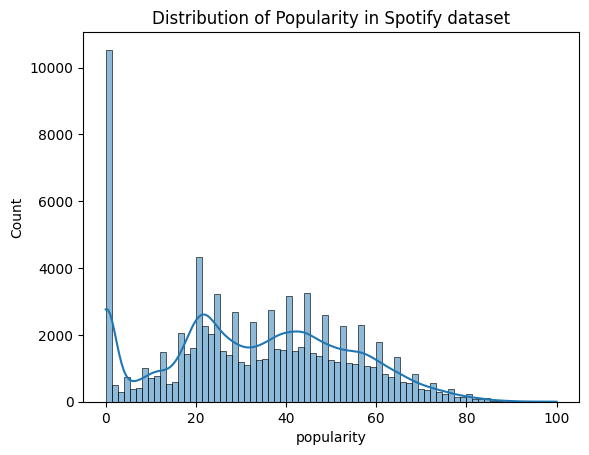

In [ ]:
sns.histplot(spotify_df.popularity,kde=True)
plt.title('Distribution of Popularity in Spotify dataset')

**We can observe the right-skewed data which is why to over-come the skewness we would now pull data from Spotify using Spotify api.**

## **7. Data collection through Spotify API:**

In [ ]:
# Set up the client credentials manager
client_id =  '63ae4cb856e04da3a12d0b1be61329c9' #'9a40b4f3712a407ba31e9e9f4d5508ce'#DO NOT USE THIS EXCEPT FOR IF AUTHORISED
client_secret =  '8b2febadbdcf45e7989943fb5cc76fa2' #'eb2e29cf811a4eb4a86d4037696f3dce'#DO NOT USE THIS WITHOUT EXPLICIT AUTHORISATION
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
# Get the playlist ID
playlist_id = '37i9dQZEVXcNuIGtTaIMH8' #'37i9dQZF1DXe2bobNYDtW8' #'37i9dQZF1DWUUeLChAs7Px'#'2LOxEzC4KmoWJ9NhW0kz5M'#'5tIkO3qnEYSRYnEs1jgP8x'

# Get the playlist details
playlist = sp.playlist(playlist_id)

# Get the number of songs in the playlist
num_songs = playlist['tracks']['total']

**Retrieving Details of Each Song in the Playlist**



In [ ]:
# Get the details of each song in the playlist
results = []
now = datetime.now()

offset = 0
while offset < num_songs:
    tracks = sp.playlist_tracks(playlist_id, offset=offset)
    results += tracks['items']
    offset += len(tracks['items'])

**Function to Clean Track Names**

In [ ]:
def clean_names(name):
    name = name.lower()
    # remove non-alphanumeric characters
    name = re.sub(r'[^a-zA-Z0-9\s]', '', name)
    # remove spaces and replace with underscore
    name = re.sub(r'\s+', '_', name)

    return name
print(results)

[{'added_at': '2023-12-04T05:00:00Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'}, 'href': 'https://api.spotify.com/v1/users/', 'id': '', 'type': 'user', 'uri': 'spotify:user:'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0RsNTNwQqjREcl3VG81prp'}, 'href': 'https://api.spotify.com/v1/artists/0RsNTNwQqjREcl3VG81prp', 'id': '0RsNTNwQqjREcl3VG81prp', 'name': 'Daffo', 'type': 'artist', 'uri': 'spotify:artist:0RsNTNwQqjREcl3VG81prp'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA'

**Extract Track Information**

In [ ]:
track_names = [results[i]["track"]["name"] for i in range(len(results))]
track_add_date = [results[i]["added_at"] for i in range(len(results))]
multiple_artists_bool = [len(results[i]["track"]["artists"]) > 1 for i in range(len(results))]
name_of_artists = [[results[i]["track"]["artists"][j]["name"] for j in range(len(results[i]["track"]["artists"]))] for i in range(len(results))]
album_name = [results[i]["track"]["album"]["name"] for i in range(len(results))]
album_release_date = [results[i]["track"]["album"]["release_date"] for i in range(len(results))]
album_release_date_precision = [results[i]["track"]["album"]["release_date_precision"] for i in range(len(results))]
number_of_tracks_in_album = [results[i]["track"]["album"]["total_tracks"] for i in range(len(results))]
position_in_playlist = [i+1 for i in range(len(results))]
track_duration_ms = [results[i]["track"]["duration_ms"] for i in range(len(results))]
id = [results[i]["track"]["id"] for i in range(len(results))]
track_popularity = [results[i]["track"]["popularity"] for i in range(len(results))]
track_explicit = [results[i]["track"]["explicit"] for i in range(len(results))]
date_scrapping = now.strftime("%Y-%m-%d")
data_collection_date = [date_scrapping for i in range(len(position_in_playlist))]

**To check if we have missing data**

In [ ]:
if len(id) == len(data_collection_date) == len(track_names) == len(track_add_date)  == len(multiple_artists_bool) == len(name_of_artists) == len(album_name) == len(album_release_date) == len(album_release_date_precision) == len(number_of_tracks_in_album) == len(position_in_playlist) == len(track_duration_ms) == len(track_popularity) == len(track_explicit):
    print("All arrays have the same length.")
else:
    print("Arrays do not have the same length.")

All arrays have the same length.


**Creating a DataFrame for new songs**

In [ ]:
dataset = pd.DataFrame({'track_id':id,"data_collection_date":data_collection_date,"track_name": track_names, "track_add_date": track_add_date,"track_add_time": multiple_artists_bool, "name_of_artists": name_of_artists, "album_name": album_name, "album_release_date": album_release_date, "album_release_date_precision": album_release_date_precision, "number_of_tracks_in_album": number_of_tracks_in_album, "position_in_playlist": position_in_playlist, "track_duration_ms": track_duration_ms, "track_popularity": track_popularity, "track_explicit": track_explicit})

In [ ]:
dataset["name_of_artists"] = dataset["name_of_artists"].astype(str)
dataset

track_id data_collection_date  \
0   3JWneiKPrQOEJQ8eXJWDq9           2023-12-06   
1   2Nd1dImwW0VVN5HJ9MfvUd           2023-12-06   
2   53Pu1MH8VqR8mkPUkPJEbw           2023-12-06   
3   0T0fkqReu2aO2H0VPUPWTo           2023-12-06   
4   5H3tZqdgoP10JunTpcUFvL           2023-12-06   
5   5XOmmOQZFpzeHnWcsFAEiX           2023-12-06   
6   58emzxS7apqOn2amBFfDyr           2023-12-06   
7   7A3uhvZBmoLzCCFQT14lGU           2023-12-06   
8   4mL3gs1HONGGLaZyW6OYMq           2023-12-06   
9   3nrTr8RJU8yYbJo57xXnh0           2023-12-06   
10  2h9fzaFksNxT7WaR5RqwXs           2023-12-06   
11  5qgyfyptP3pLeWs9maKPkg           2023-12-06   
12  71eUN154oDoZ2OSvS4GaL7           2023-12-06   
13  3bW3FVztCl5BoY8QooHHzj           2023-12-06   
14  19jTCAxeVnkwKnWHSsdg0i           2023-12-06   
15  1jJvNlkbQmtRpG9uIUpiYA           2023-12-06   
16  2tUzZiFwDCpIx6Hfa8ofoW           2023-12-06   
17  6lXTGkDn7tTNR38b7Spqgs           2023-12-06   
18  6andWFPbmPzbgdKcEamIq9           2023-12-06   
19  5wIYMYa6syn9xxL3i0mVx9           2023-12-06   
20  0InIoa05NmkSGlRD6wiQBN           2023-12-06   
21  6ONTW7En776d3rHoJ2oynA           2023-12-06   
22  3j2kzar3MebQqiwLE2XOkO           2023-12-06   
23  69inNA6QmJ1uWzBIAxyC26           2023-12-06   
24  7kofQ4W8kA6nOzyXdPz7ny           2023-12-06   
25  7EIDrlc32If1yF7pmIdACc           2023-12-06   
26  1usL7pG5XVHub0QIoJ1Lrt           2023-12-06   
27  1SNc2qOJzugq25SfARkAPR           2023-12-06   
28  6ydPTlLqw0Y1hWmEqCiRQK           2023-12-06   
29  4fn4imVYZcfM5s4cSCDRTm           2023-12-06   

                                  track_name        track_add_date  \
0                              Poor Madeline  2023-12-04T05:00:00Z   
1                      Name Something Better  2023-12-04T05:00:00Z   
2               I Have Considered the Lilies  2023-12-04T05:00:00Z   
3      Baby I'm Yours - Digitally Remastered  2023-12-04T05:00:00Z   
4                          God Help The Girl  2023-12-04T05:00:00Z   
5                                       Blue  2023-12-04T05:00:00Z   
6                     No One Has the Answers  2023-12-04T05:00:00Z   
7                                  The Giver  2023-12-04T05:00:00Z   
8                                  Close One  2023-12-04T05:00:00Z   
9                          Come Monday Night  2023-12-04T05:00:00Z   
10                                      Blur  2023-12-04T05:00:00Z   
11                              Rambling Man  2023-12-04T05:00:00Z   
12                           Fucking Married  2023-12-04T05:00:00Z   
13  Little Queenie (2023 Remastered Version)  2023-12-04T05:00:00Z   
14                             Lucky for You  2023-12-04T05:00:00Z   
15                                      Teal  2023-12-04T05:00:00Z   
16                   The Magdalene Laundries  2023-12-04T05:00:00Z   
17                           Ignore the Days  2023-12-04T05:00:00Z   
18                        Your Mother's Name  2023-12-04T05:00:00Z   
19                                 Superstar  2023-12-04T05:00:00Z   
20                         California - Live  2023-12-04T05:00:00Z   
21                                   Want Me  2023-12-04T05:00:00Z   
22                                 So Sleepy  2023-12-04T05:00:00Z   
23                                       Low  2023-12-04T05:00:00Z   
24                            mirrored heart  2023-12-04T05:00:00Z   
25                           I Love You More  2023-12-04T05:00:00Z   
26                        Last of the Loving  2023-12-04T05:00:00Z   
27                               Blue, Pt. 2  2023-12-04T05:00:00Z   
28                                   Control  2023-12-04T05:00:00Z   
29                      A Well Respected Man  2023-12-04T05:00:00Z   

    track_add_time                                    name_of_artists  \
0            False                                          ['Daffo']   
1            False                                       ['Ray Bull']   
2            False                            

## **8. Exploring the playlist:**

### 8.1 Checking the popularity tracks distribution in the playlist #13:

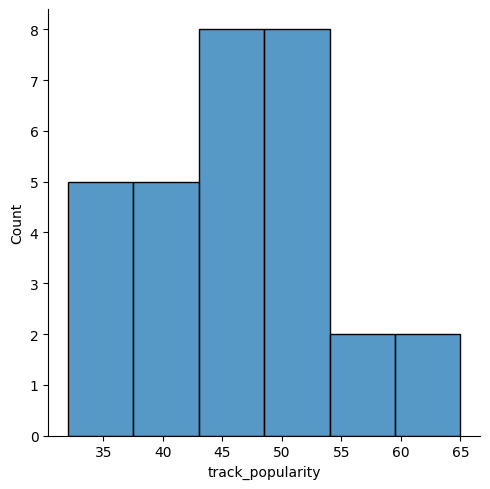

In [ ]:
sns.displot(dataset.track_popularity,kind='hist')
dataset=dataset[dataset.track_popularity>40]

The above graph shows the distribution of a particular playlist we have pulled.
Since

In [ ]:
dataset

track_id data_collection_date  \
0   3JWneiKPrQOEJQ8eXJWDq9           2023-12-06   
1   2Nd1dImwW0VVN5HJ9MfvUd           2023-12-06   
3   0T0fkqReu2aO2H0VPUPWTo           2023-12-06   
5   5XOmmOQZFpzeHnWcsFAEiX           2023-12-06   
7   7A3uhvZBmoLzCCFQT14lGU           2023-12-06   
8   4mL3gs1HONGGLaZyW6OYMq           2023-12-06   
10  2h9fzaFksNxT7WaR5RqwXs           2023-12-06   
11  5qgyfyptP3pLeWs9maKPkg           2023-12-06   
12  71eUN154oDoZ2OSvS4GaL7           2023-12-06   
13  3bW3FVztCl5BoY8QooHHzj           2023-12-06   
14  19jTCAxeVnkwKnWHSsdg0i           2023-12-06   
15  1jJvNlkbQmtRpG9uIUpiYA           2023-12-06   
16  2tUzZiFwDCpIx6Hfa8ofoW           2023-12-06   
18  6andWFPbmPzbgdKcEamIq9           2023-12-06   
19  5wIYMYa6syn9xxL3i0mVx9           2023-12-06   
21  6ONTW7En776d3rHoJ2oynA           2023-12-06   
23  69inNA6QmJ1uWzBIAxyC26           2023-12-06   
24  7kofQ4W8kA6nOzyXdPz7ny           2023-12-06   
26  1usL7pG5XVHub0QIoJ1Lrt           2023-12-06   
27  1SNc2qOJzugq25SfARkAPR           2023-12-06   
28  6ydPTlLqw0Y1hWmEqCiRQK           2023-12-06   
29  4fn4imVYZcfM5s4cSCDRTm           2023-12-06   

                                  track_name        track_add_date  \
0                              Poor Madeline  2023-12-04T05:00:00Z   
1                      Name Something Better  2023-12-04T05:00:00Z   
3      Baby I'm Yours - Digitally Remastered  2023-12-04T05:00:00Z   
5                                       Blue  2023-12-04T05:00:00Z   
7                                  The Giver  2023-12-04T05:00:00Z   
8                                  Close One  2023-12-04T05:00:00Z   
10                                      Blur  2023-12-04T05:00:00Z   
11                              Rambling Man  2023-12-04T05:00:00Z   
12                           Fucking Married  2023-12-04T05:00:00Z   
13  Little Queenie (2023 Remastered Version)  2023-12-04T05:00:00Z   
14                             Lucky for You  2023-12-04T05:00:00Z   
15                                      Teal  2023-12-04T05:00:00Z   
16                   The Magdalene Laundries  2023-12-04T05:00:00Z   
18                        Your Mother's Name  2023-12-04T05:00:00Z   
19                                 Superstar  2023-12-04T05:00:00Z   
21                                   Want Me  2023-12-04T05:00:00Z   
23                                       Low  2023-12-04T05:00:00Z   
24                            mirrored heart  2023-12-04T05:00:00Z   
26                        Last of the Loving  2023-12-04T05:00:00Z   
27                               Blue, Pt. 2  2023-12-04T05:00:00Z   
28                                   Control  2023-12-04T05:00:00Z   
29                      A Well Respected Man  2023-12-04T05:00:00Z   

    track_add_time                      name_of_artists  \
0            False                            ['Daffo']   
1            False                         ['Ray Bull']   
3            False                      ['Cass Elliot']   
5            False                           ['NewDad']   
7            False                    ['Sarah Kinsley']   
8            False                             ['FIZZ']   
10           False                 ['Pleasure Systems']   
11           False                    ['Laura Marling']   
12           False                        ['Harriette']   
13           False                          ['SadGirl']   
14            True        ['Novo Amor', 'Gia Margaret']   
15           False                      ['Wunderhorse']   
16            True  ['The Chieftains', 'Joni Mitchell']   
18           False                   ['Susannah Joffe']   
19           False                      ['Pretty Sick']   
21           False                       ['Baby Queen']   
23           False                 ['Victoria Bigelow']   
24           False                        ['FKA twigs']   
26           False                             ['Coco']   
27           False                      ['Waxahatchee

In [ ]:
dataset.reset_index(inplace=True)

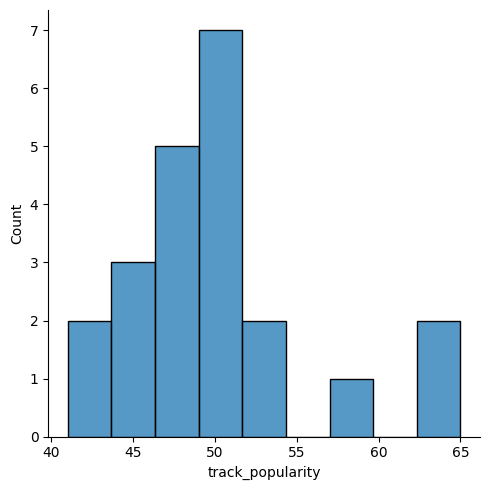

In [ ]:
sns.displot(dataset.track_popularity,kind='hist')

In [ ]:
dataset.corr()

<ipython-input-58-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


index  track_add_time  \
index                      1.000000e+00   -9.268110e-17   
track_add_time            -9.268110e-17    1.000000e+00   
number_of_tracks_in_album  3.758498e-01   -3.886082e-02   
position_in_playlist       1.000000e+00   -9.671071e-17   
track_duration_ms         -1.006314e-01    1.054560e-01   
track_popularity          -1.614121e-01    2.948394e-01   
track_explicit             6.763272e-02   -1.490712e-01   

                           number_of_tracks_in_album  position_in_playlist  \
index                                       0.375850          1.000000e+00   
track_add_time                             -0.038861         -9.671071e-17   
number_of_tracks_in_album                   1.000000          3.758498e-01   
position_in_playlist                        0.375850          1.000000e+00   
track_duration_ms                          -0.022086         -1.006314e-01   
track_popularity                           -0.040495         -1.614121e-01   
track_explicit                              0.148233          6.763272e-02   

                           track_duration_ms  track_popularity  track_explicit  
index                              -0.100631         -0.161412        0.067633  
track_add_time                      0.105456          0.294839       -0.149071  
number_of_tracks_in_album          -0.022086         -0.040495        0.148233  
position_in_playlist               -0.100631         -0.161412        0.067633  
track_duration_ms                   1.000000         -0.367026        0.419889  
track_popularity                   -0.367026          1.000000       -0.305833  
track_explicit                      0.419889         -0.305833        1.000000

**This is the analysis for playlist no.13. We had done the same for the 12 playlists before this and downloaded and concated each of them.**

**The concated playlist would be added to Spotify Dataset**

In [ ]:
# dataset.to_csv('temp.csv')

In [ ]:
# dataset=pd.read_csv('/content/temp.csv',index_col=0)
# dataset

In [ ]:
features = []
for i in range(0, len(dataset['track_id']), 50):
    track_ids = dataset['track_id'][i:i+50]
    track_features = sp.audio_features(tracks=track_ids)
    features.extend(track_features)
    #time.sleep(40) # Add a delay of 1 second

# Create a DataFrame from the features
df = pd.DataFrame(features)

**The above code performs a second API call to get track-level audio feature data for each track in the playlist.**


In [ ]:
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.325   0.550   11    -8.178     1       0.0303        0.0479   
1         0.689   0.452    2    -7.433     1       0.0351        0.6170   
2         0.518   0.487    4   -11.032     1       0.0320        0.3760   
3         0.620   0.580   10    -9.952     1       0.0258        0.7990   
4         0.442   0.180    2   -10.993     1       0.0321        0.7560   

   instrumentalness  liveness  valence    tempo            type  \
0          0.013800    0.1240   0.2280   82.249  audio_features   
1          0.005440    0.1150   0.6820  149.912  audio_features   
2          0.000001    0.0985   0.8210  202.695  audio_features   
3          0.919000    0.1140   0.5030  119.977  audio_features   
4          0.023800    0.1150   0.0871  111.186  audio_features   

                       id                                   uri  \
0  3JWneiKPrQOEJQ8eXJWDq9  spotify:track:3JWneiKPrQOEJQ8eXJWDq9   
1  2Nd1dImwW0VVN5HJ9MfvUd  spotify:track:2Nd1dImwW0VVN5HJ9MfvUd   
2  0T0fkqReu2aO2H0VPUPWTo  spotify:track:0T0fkqReu2aO2H0VPUPWTo   
3  5XOmmOQZFpzeHnWcsFAEiX  spotify:track:5XOmmOQZFpzeHnWcsFAEiX   
4  7A3uhvZBmoLzCCFQT14lGU  spotify:track:7A3uhvZBmoLzCCFQT14lGU   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3JWneiKPrQOE...   
1  https://api.spotify.com/v1/tracks/2Nd1dImwW0VV...   
2  https://api.spotify.com/v1/tracks/0T0fkqReu2aO...   
3  https://api.spotify.com/v1/tracks/5XOmmOQZFpze...   
4  https://api.spotify.com/v1/tracks/7A3uhvZBmoLz...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3JWn...       211278   
1  https://api.spotify.com/v1/audio-analysis/2Nd1...       241200   
2  https://api.spotify.com/v1/audio-analysis/0T0f...       152360   
3  https://api.spotify.com/v1/audio-analysis/5XOm...       198427   
4  https://api.spotify.com/v1/audio-analysis/7A3u...       227210   

   time_signature  
0               3  
1               4  
2               4  
3               4  
4               4

## **9. Merging Spotify Dataset and 13 Playlist:**

In [ ]:
# Merge the features DataFrame with the playlist dataset
dataset = pd.concat([dataset, df], axis=1)

In [ ]:
dataset

index                track_id data_collection_date  \
0       0  3JWneiKPrQOEJQ8eXJWDq9           2023-12-06   
1       1  2Nd1dImwW0VVN5HJ9MfvUd           2023-12-06   
2       3  0T0fkqReu2aO2H0VPUPWTo           2023-12-06   
3       5  5XOmmOQZFpzeHnWcsFAEiX           2023-12-06   
4       7  7A3uhvZBmoLzCCFQT14lGU           2023-12-06   
5       8  4mL3gs1HONGGLaZyW6OYMq           2023-12-06   
6      10  2h9fzaFksNxT7WaR5RqwXs           2023-12-06   
7      11  5qgyfyptP3pLeWs9maKPkg           2023-12-06   
8      12  71eUN154oDoZ2OSvS4GaL7           2023-12-06   
9      13  3bW3FVztCl5BoY8QooHHzj           2023-12-06   
10     14  19jTCAxeVnkwKnWHSsdg0i           2023-12-06   
11     15  1jJvNlkbQmtRpG9uIUpiYA           2023-12-06   
12     16  2tUzZiFwDCpIx6Hfa8ofoW           2023-12-06   
13     18  6andWFPbmPzbgdKcEamIq9           2023-12-06   
14     19  5wIYMYa6syn9xxL3i0mVx9           2023-12-06   
15     21  6ONTW7En776d3rHoJ2oynA           2023-12-06   
16     23  69inNA6QmJ1uWzBIAxyC26           2023-12-06   
17     24  7kofQ4W8kA6nOzyXdPz7ny           2023-12-06   
18     26  1usL7pG5XVHub0QIoJ1Lrt           2023-12-06   
19     27  1SNc2qOJzugq25SfARkAPR           2023-12-06   
20     28  6ydPTlLqw0Y1hWmEqCiRQK           2023-12-06   
21     29  4fn4imVYZcfM5s4cSCDRTm           2023-12-06   

                                  track_name        track_add_date  \
0                              Poor Madeline  2023-12-04T05:00:00Z   
1                      Name Something Better  2023-12-04T05:00:00Z   
2      Baby I'm Yours - Digitally Remastered  2023-12-04T05:00:00Z   
3                                       Blue  2023-12-04T05:00:00Z   
4                                  The Giver  2023-12-04T05:00:00Z   
5                                  Close One  2023-12-04T05:00:00Z   
6                                       Blur  2023-12-04T05:00:00Z   
7                               Rambling Man  2023-12-04T05:00:00Z   
8                            Fucking Married  2023-12-04T05:00:00Z   
9   Little Queenie (2023 Remastered Version)  2023-12-04T05:00:00Z   
10                             Lucky for You  2023-12-04T05:00:00Z   
11                                      Teal  2023-12-04T05:00:00Z   
12                   The Magdalene Laundries  2023-12-04T05:00:00Z   
13                        Your Mother's Name  2023-12-04T05:00:00Z   
14                                 Superstar  2023-12-04T05:00:00Z   
15                                   Want Me  2023-12-04T05:00:00Z   
16                                       Low  2023-12-04T05:00:00Z   
17                            mirrored heart  2023-12-04T05:00:00Z   
18                        Last of the Loving  2023-12-04T05:00:00Z   
19                               Blue, Pt. 2  2023-12-04T05:00:00Z   
20                                   Control  2023-12-04T05:00:00Z   
21                      A Well Respected Man  2023-12-04T05:00:00Z   

    track_add_time                      name_of_artists  \
0            False                            ['Daffo']   
1            False                         ['Ray Bull']   
2            False                      ['Cass Elliot']   
3            False                           ['NewDad']   
4            False                    ['Sarah Kinsley']   
5            False                             ['FIZZ']   
6            False                 ['Pleasure Systems']   
7            False                    ['Laura Marling']   
8            False                        ['Harriette']   
9            False                          ['SadGirl']   
10            True        ['Novo Amor', 'Gia Margaret']   
11           False                      ['Wunderhorse']   
12            True  ['The Chieftains', 'Joni Mitchell']   
13           False                   ['Susannah Joffe']   
14           False                      ['Pretty Sick']   
15           False                       ['Baby Queen']   
16           False                 ['Victoria Bigelow']

In [ ]:
print(dataset.columns)
dataset.rename({'track_popularity':'popularity','name_of_artists':'artists','track_explicit':'explicit'},inplace=True,axis=1)
dataset.columns

Index(['index', 'track_id', 'data_collection_date', 'track_name',
       'track_add_date', 'track_add_time', 'name_of_artists', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'number_of_tracks_in_album', 'position_in_playlist',
       'track_duration_ms', 'track_popularity', 'track_explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')


Index(['index', 'track_id', 'data_collection_date', 'track_name',
       'track_add_date', 'track_add_time', 'artists', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'number_of_tracks_in_album', 'position_in_playlist',
       'track_duration_ms', 'popularity', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

### 9.1 Cleaning the Merged Dataset

In [ ]:
merge = pd.merge(spotify_df,dataset,how='outer', on=['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature','explicit'])

In [ ]:
columns_to_keep = ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','explicit', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
merge = merge.loc[:, columns_to_keep]

In [ ]:
merge = merge.drop_duplicates(subset=['track_id'])

In [ ]:
merge = merge.dropna(subset=['track_id'])

In [ ]:
merge.shape

In [ ]:
sns.displot(merge.popularity,kind='kde')

In [ ]:
merge.shape

In [ ]:
merge.to_csv('new_dataset (13).csv')

## **10. Analysis of Merged Data**

In [ ]:
merge=pd.read_csv('/content/gdrive/MyDrive/BA_810/810 Project/new_dataset (13).csv')

In [ ]:
merge.shape

(92233, 20)

In [ ]:
merge.drop_duplicates(inplace=True)

In [ ]:
merge

Unnamed: 0                track_id  \
0               0  5SuOikwiRyPMVoIQDJUgSV   
1               1  4qPNDBW1i3p13qLCt0Ki3A   
2               2  1iJBSr7s7jYXzM8EGcbK5b   
3               3  6lfxq3CG4xtTiEg7opyCyx   
4               4  5vjLSffimiIP26QG5WcN2K   
...           ...                     ...   
92228       92509  1y5beX4vn7QPfg36r4jiWo   
92229       92515  4oU3ELywkFbHbHpqqBZYig   
92230       92516  1OACsTiYokI4NUgnMonSmt   
92231       92517  28veUNu4veN0LOBVa0nFw8   
92232       92522  1MbYpxr2x4f2B13OHLwQgw   

                                                 artists  \
0                                            Gen Hoshino   
1                                           Ben Woodward   
2                                 Ingrid Michaelson;ZAYN   
3                                           Kina Grannis   
4                                       Chord Overstreet   
...                                                  ...   
92228  ['Maninder Buttar', 'Zara Khan', 'Tanishk Bagc...   
92229        ['Garry Sandhu', 'Neha Kakkar', 'Mellow D']   
92230                    ['Zack Knight', 'Jasmin Walia']   
92231  ['Yash Narvekar', 'Parampara Tandon', 'Tanishk...   
92232                                          ['Rouge']   

                                              album_name  \
0                                                 Comedy   
1                                       Ghost (Acoustic)   
2                                         To Begin Again   
3      Crazy Rich Asians (Original Motion Picture Sou...   
4                                                Hold On   
...                                                  ...   
92228           Sakhiyan2.0 (From "BellBottom") - Single   
92229                                     De De Pyaar De   
92230                             Sonu Ke Titu Ki Sweety   
92231                  Muqabla (From "Street Dancer 3D")   
92232                                       Don't Be Shy   

                              track_name  popularity  duration_ms  \
0                                 Comedy        73.0     230666.0   
1                       Ghost - Acoustic        55.0     149610.0   
2                         To Begin Again        57.0     210826.0   
3             Can't Help Falling In Love        71.0     201933.0   
4                                Hold On        82.0     198853.0   
...                                  ...         ...          ...   
92228    Sakhiyan2.0 (From "BellBottom")        52.0     177695.0   
92229                        Hauli Hauli        54.0     209393.0   
92230                    Bom Diggy Diggy        61.0     238530.0   
92231  Muqabla (From "Street Dancer 3D")        69.0     176125.0   
92232                       Don't Be Shy        51.0     192253.0   

       danceability  energy   key  loudness  mode  speechiness  acousticness  \
0             0.676  0.4610   1.0    -6.746   0.0       0.1430        0.0322   
1             0.420  0.1660   1.0   -17.235   1.0       0.0763        0.9240   
2             0.438  0.3590   0.0    -9.734   1.0       0.0557        0.2100   
3             0.266  0.0596   0.0   -18.515   1.0       0.0363        0.9050   
4             0.618  0.4430   2.0    -9.681   1.0       0.0526        0.4690   
...             ...     ...   ...       ...   ...          ...           ...   
92228         0.817  0.7150   9.0    -5.130   1.0       0.0484        0.1830   
92229         0.705  0.9820   1.0    -3.376   1.0       0.0788        0.0212   
92230         0.782  0.8270  11.0    -4.219   0.0       0.0627        0.1590   
92231         0.804  0.9130   0.0    -3.135   1.0       0.0933        0.0248   
92232         0.762  0.6550   2.0    -8.299   0.0       0.0970        0.2160   

       explicit  instrumentalness  liveness  valence    tempo  time_signature  
0         False          0.000001    0.3580    0.715   87.917             4.0  
1         False          0.000006    0.1010    0.267   77.489             

In [ ]:
len(merge[merge.popularity>=10])

78367

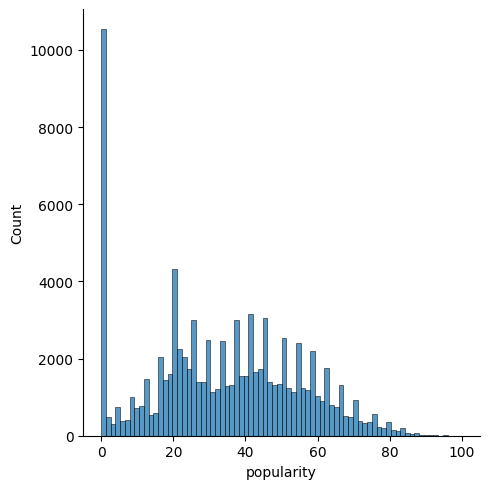

In [ ]:
sns.displot(merge.popularity,kind='hist')

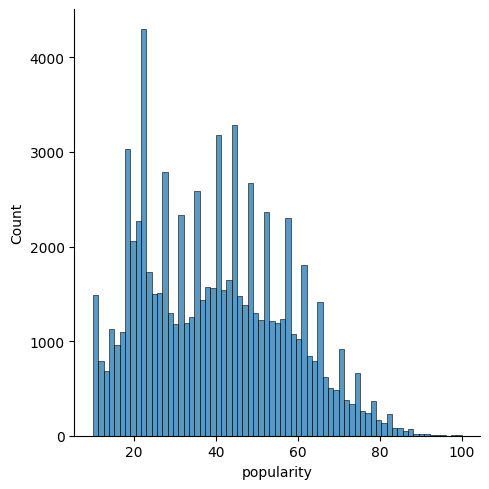

In [ ]:
merge = merge[merge.popularity >=10]
sns.displot(merge.popularity,kind='hist')

In [ ]:
merge['mult_artists'] = merge['artists'].str.contains('[,;]').astype(int)
merge = merge.assign(is_popular=(merge['popularity'] >= 55).astype(int))
merge['num_artists'] = merge['artists'].str.count('[,;]') + 1

<ipython-input-93-152f23c3d074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge['mult_artists'] = merge['artists'].str.contains('[,;]').astype(int)


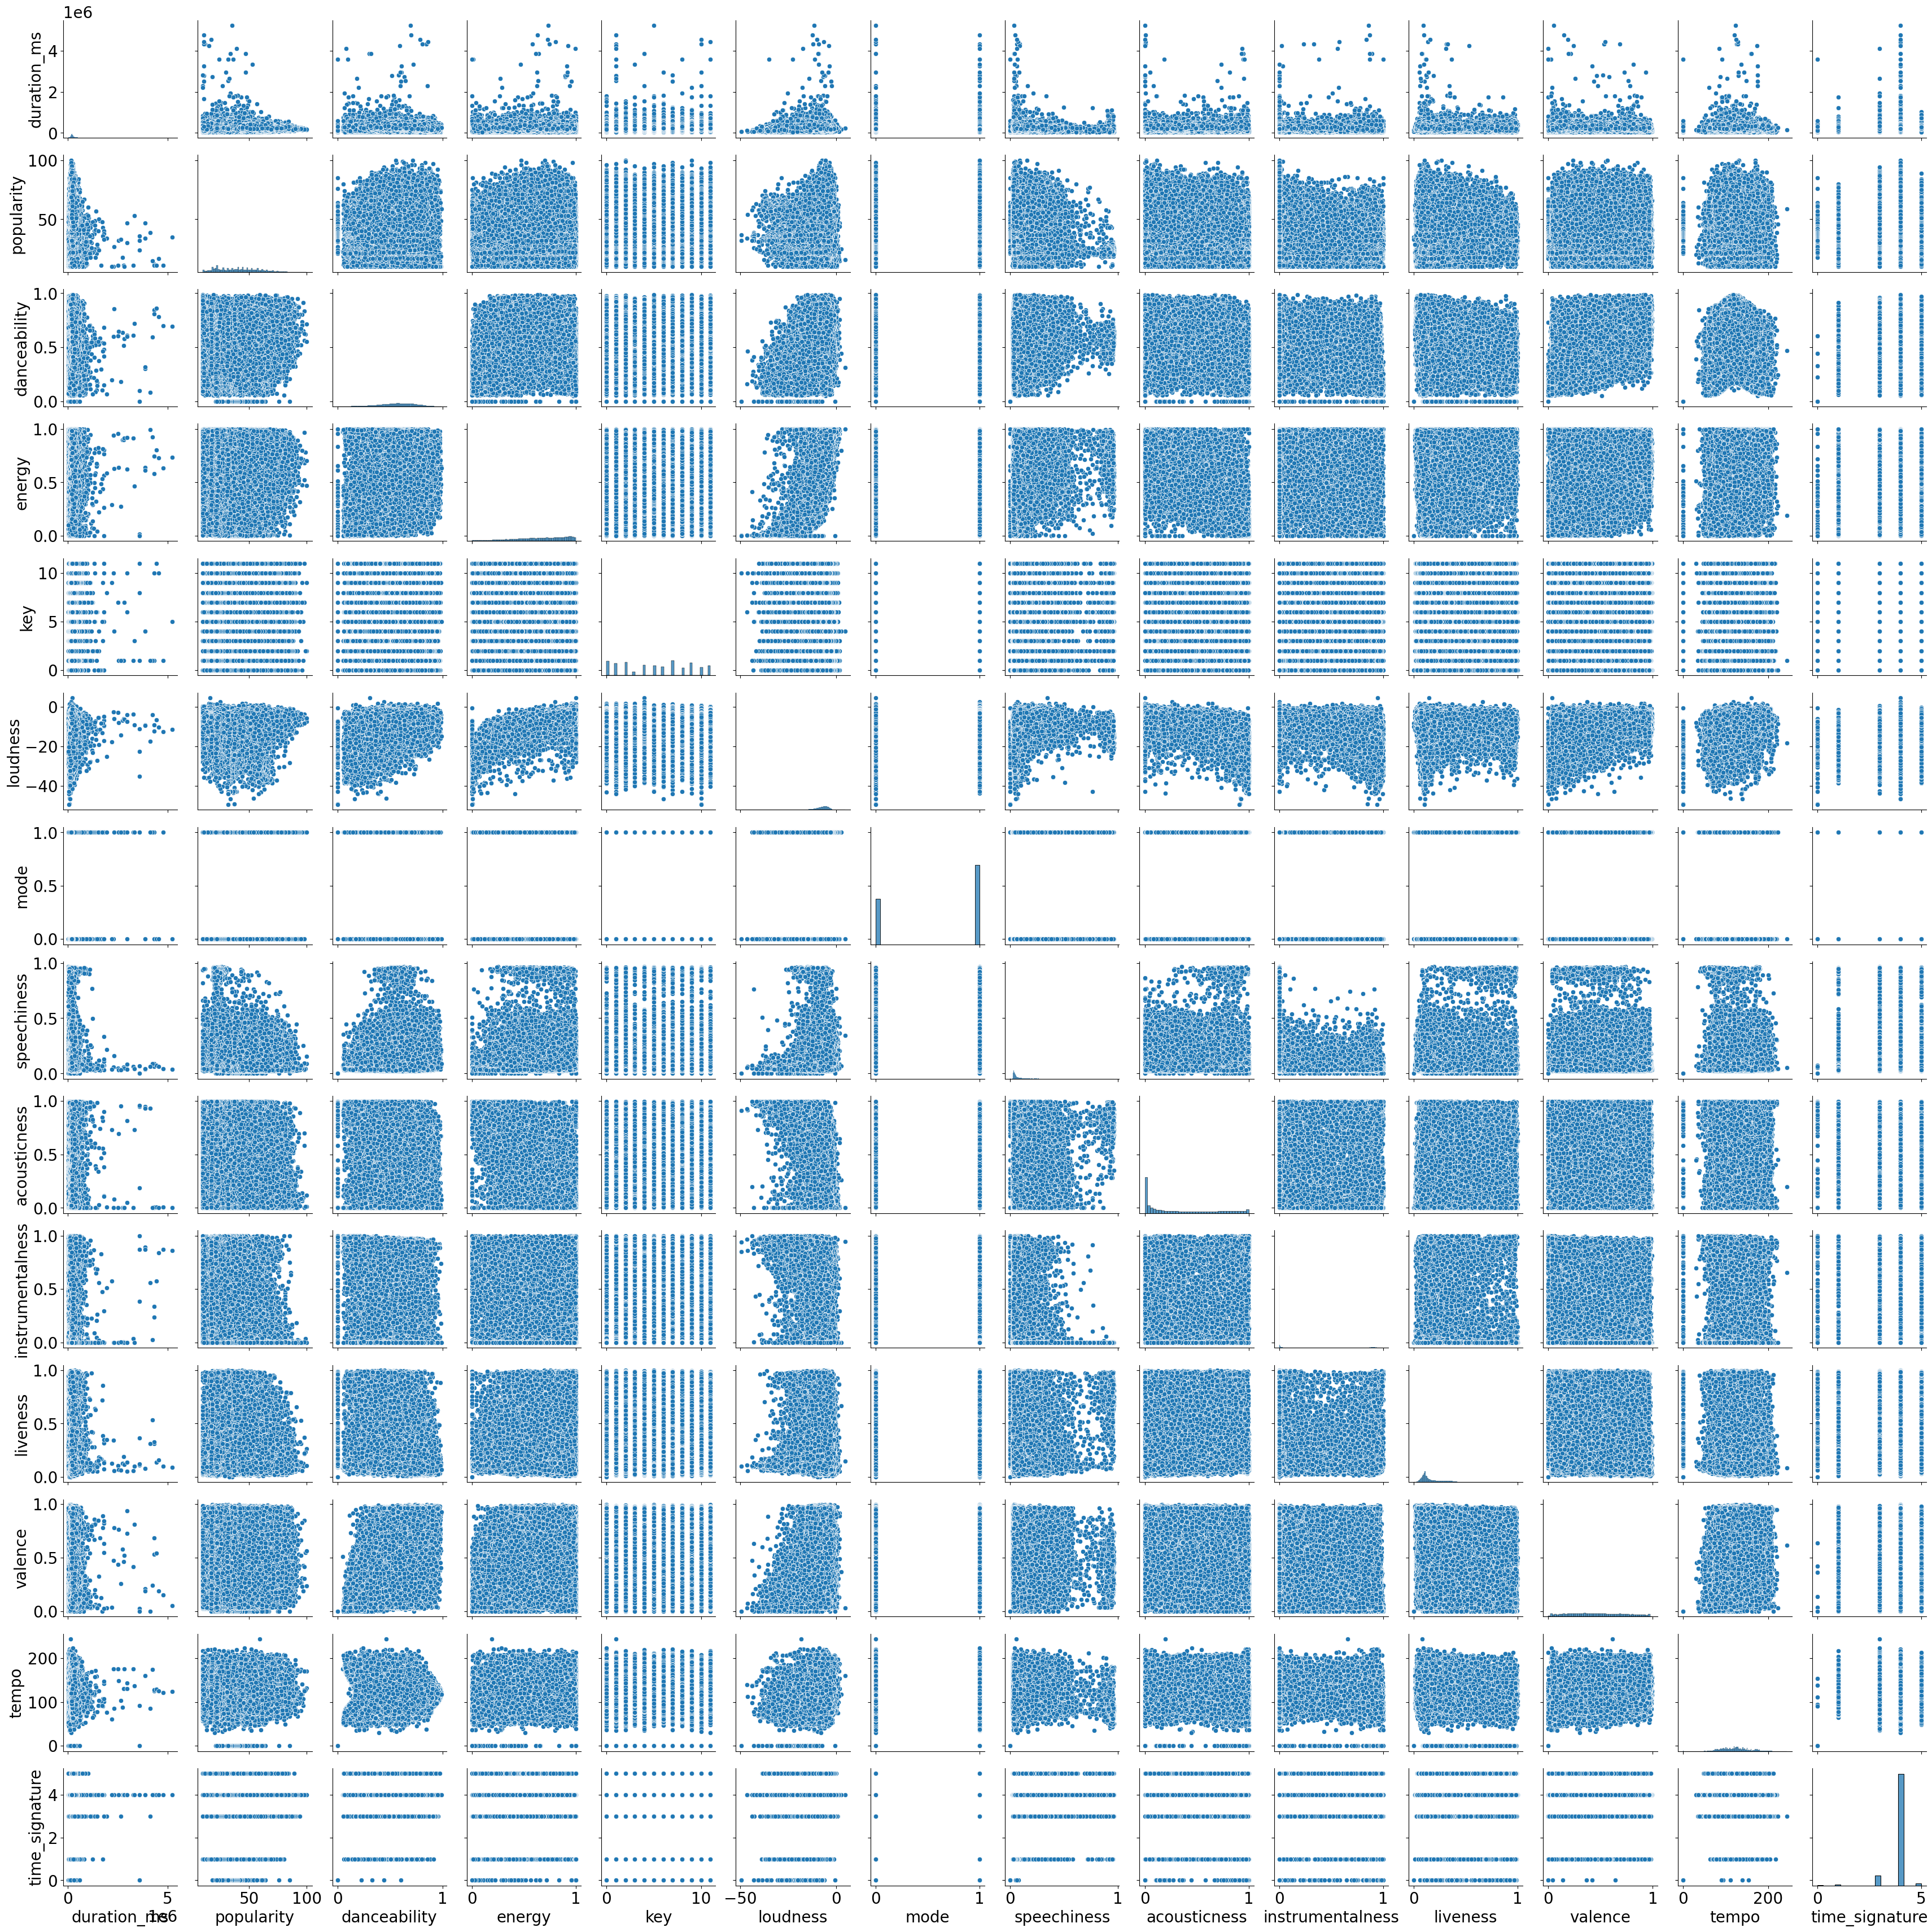

In [ ]:
numeric_variables = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                      'valence', 'tempo', 'time_signature']

numeric_df = merge[numeric_variables]


sns.pairplot(numeric_df)
plt.show()

In [ ]:
merge.head(3)

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   

         album_name        track_name  popularity  duration_ms  danceability  \
0            Comedy            Comedy        73.0     230666.0         0.676   
1  Ghost (Acoustic)  Ghost - Acoustic        55.0     149610.0         0.420   
2    To Begin Again    To Begin Again        57.0     210826.0         0.438   

   energy  key  ...  acousticness  explicit  instrumentalness  liveness  \
0   0.461  1.0  ...        0.0322     False          0.000001     0.358   
1   0.166  1.0  ...        0.9240     False          0.000006     0.101   
2   0.359  0.0  ...        0.2100     False          0.000000     0.117   

   valence   tempo  time_signature  mult_artists  is_popular  num_artists  
0    0.715  87.917             4.0             0           1            1  
1    0.267  77.489             4.0             0           1            1  
2    0.120  76.332             4.0             1           1            2  

[3 rows x 23 columns]

In [ ]:
len(merge[merge.is_popular==1])

17348

In [ ]:
# Select rows with is_popular = 0
df_0 = merge[merge['is_popular'] == 0]

# Select rows with is_popular = 1
df_1 = merge[merge['is_popular'] == 1]

# Concatenate the two DataFrames
new_df = pd.concat([df_0, df_1])

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78367 entries, 12 to 92231
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        78367 non-null  int64  
 1   track_id          78367 non-null  object 
 2   artists           78367 non-null  object 
 3   album_name        78367 non-null  object 
 4   track_name        78367 non-null  object 
 5   popularity        78367 non-null  float64
 6   duration_ms       78367 non-null  float64
 7   danceability      78367 non-null  float64
 8   energy            78367 non-null  float64
 9   key               78367 non-null  float64
 10  loudness          78367 non-null  float64
 11  mode              78367 non-null  float64
 12  speechiness       78367 non-null  float64
 13  acousticness      78367 non-null  float64
 14  explicit          78367 non-null  bool   
 15  instrumentalness  78367 non-null  float64
 16  liveness          78367 non-null  float

### 10.1 Correlation Matrix:

In [ ]:
new_df = new_df.drop(['popularity','Unnamed: 0'], axis=1)
new_df.corr()

<ipython-input-98-4918099cc672>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


duration_ms  danceability    energy       key  loudness  \
duration_ms          1.000000     -0.062071  0.062250  0.011673  0.019747   
danceability        -0.062071      1.000000  0.093849  0.030124  0.236944   
energy               0.062250      0.093849  1.000000  0.041144  0.754808   
key                  0.011673      0.030124  0.041144  1.000000  0.034088   
loudness             0.019747      0.236944  0.754808  0.034088  1.000000   
mode                -0.032268     -0.063687 -0.079942 -0.141729 -0.045442   
speechiness         -0.063864      0.104427  0.137628  0.013360  0.050906   
acousticness        -0.102525     -0.127579 -0.717487 -0.041202 -0.571881   
explicit            -0.063867      0.124580  0.093592  0.001612  0.104912   
instrumentalness     0.077551     -0.197517 -0.178961 -0.004595 -0.424291   
liveness             0.012553     -0.140426  0.190844 -0.000923  0.074078   
valence             -0.133652      0.478880  0.238785  0.022791  0.267849   
tempo                0.026228     -0.036657  0.251426  0.003693  0.226577   
time_signature       0.024391      0.202254  0.176822  0.013023  0.196837   
mult_artists         0.018265      0.115568 -0.003839  0.010504  0.046545   
is_popular          -0.043546      0.103343 -0.023906  0.003242  0.041200   
num_artists          0.026479      0.057736 -0.029227  0.006112  0.002638   

                      mode  speechiness  acousticness  explicit  \
duration_ms      -0.032268    -0.063864     -0.102525 -0.063867   
danceability     -0.063687     0.104427     -0.127579  0.124580   
energy           -0.079942     0.137628     -0.717487  0.093592   
key              -0.141729     0.013360     -0.041202  0.001612   
loudness         -0.045442     0.050906     -0.571881  0.104912   
mode              1.000000    -0.038639      0.094308 -0.032623   
speechiness      -0.038639     1.000000      0.019724  0.349340   
acousticness      0.094308     0.019724      1.000000 -0.086351   
explicit         -0.032623     0.349340     -0.086351  1.000000   
instrumentalness -0.047859    -0.104440      0.096254 -0.116295   
liveness          0.018237     0.232474     -0.012943  0.039039   
valence           0.020747     0.028594     -0.076898 -0.006350   
tempo            -0.003706    -0.008918     -0.209844 -0.010493   
time_signature   -0.026093    -0.014065     -0.163076  0.038994   
mult_artists     -0.057151     0.028182     -0.015629  0.049352   
is_popular       -0.027150    -0.033743     -0.056330  0.101907   
num_artists      -0.036730     0.038131      0.014907  0.038974   

                  instrumentalness  liveness   valence     tempo  \
duration_ms               0.077551  0.012553 -0.133652  0.026228   
danceability             -0.197517 -0.140426  0.478880 -0.036657   
energy                   -0.178961  0.190844  0.238785  0.251426   
key                      -0.004595 -0.000923  0.022791  0.003693   
loudness                 -0.424291  0.074078  0.267849  0.226577   
mode                     -0.047859  0.018237  0.020747 -0.003706   
speechiness              -0.104440  0.232474  0.028594 -0.008918   
acousticness              0.096254 -0.012943 -0.076898 -0.209844   
explicit                 -0.116295  0.039039 -0.006350 -0.010493   
instrumentalness          1.000000 -0.086710 -0.328462 -0.053979   
liveness                 -0.086710  1.000000  0.011098 -0.010600   
valence                  -0.328462  0.011098  1.000000  0.081320   
tempo                    -0.053979 -0.010600  0.081320  1.000000   
time_signature           -0.089913 -0.037768  0.129018  0.090512   
mult_artists             -0.058822 -0.031097 -0.034838 -0.006535   
is_popular               -0.123470 -0.107721  0.016721 -0.031779   
num_artists              -0.048273 -0.015530 -0.032980 -0.027401   

                  time_signature  mult_artists  is_popular  num_artists  
duration_ms             0.024391      0.018265   -0.043546     0.026479  
danceability            0.202254      0.115568    0

In [ ]:
new_df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'duration_ms',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'explicit', 'instrumentalness', 'liveness', 'valence',
       'tempo', 'time_signature', 'mult_artists', 'is_popular', 'num_artists'],
      dtype='object')

In [ ]:
#new_df = new_df.select_dtypes(include='number')
new_df = new_df.drop(['album_name', 'track_name','track_id', 'artists'], axis=1)
new_df.columns

Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'explicit', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'mult_artists',
       'is_popular', 'num_artists'],
      dtype='object')

## **11. Preprocessing Pipeline:**

### 11.1 Transforming numeric and categorical variables

In [ ]:
X = new_df.drop('is_popular', axis=1)
y = new_df['is_popular'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

# Define the columns that need to be scaled
numeric_features = ['instrumentalness', 'energy', 'liveness', 'danceability', 'speechiness', 'duration_ms', 'loudness', 'acousticness','valence', 'tempo', 'time_signature',]

# Define the columns that need to be one-hot encoded
categorical_features = ['key', 'mult_artists', 'num_artists', 'explicit','mode']
num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(drop='first',handle_unknown='ignore'))
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
    ])


prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['instrumentalness', 'energy', 'liveness',
                                  'danceability', 'speechiness', 'duration_ms',
                                  'loudness', 'acousticness', 'valence',
                                  'tempo', 'time_signature']),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['key', 'mult_artists', 'num_artists',
                                  'explicit', 'mode'])])

**For numerical data we are using StandardScalar while for categorical we are using OneHotEncoder**

### 11.2 Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

kbest = SelectKBest(score_func=f_classif, k=10)

k_best_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', kbest)
])

k_best_pipe.fit(X_train, y_train)

selected_features = k_best_pipe.named_steps['prep'].get_feature_names_out()[k_best_pipe.named_steps['select'].get_support()]
print(f'The selected features are {selected_features}')

The selected features are ['num__instrumentalness' 'num__liveness' 'num__danceability'
 'num__duration_ms' 'num__loudness' 'num__acousticness'
 'cat__mult_artists_1' 'cat__num_artists_2' 'cat__num_artists_3'
 'cat__explicit_True']


In [ ]:
def print_scores(y_test, y_pred):
  plt.rc("font", size=20)
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False)
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')
  recall = recall_score(y_test, y_pred, pos_label=1)
  f1 = f1_score(y_test, y_pred, pos_label=1)
  precision = precision_score(y_test, y_pred)
  print(f'Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')

## **12. Models**

###12.1 Random Forest Classifier


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

rfc_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42) ),
    ('model', RandomForestClassifier())
])

rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['instrumentalness', 'energy',
                                                   'liveness', 'danceability',
                                                   'speechiness', 'duration_ms',
                                                   'loudness', 'acousticness',
                                                   'valence', 'tempo',
                                                   'time_signature']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['key', 'mult_artists',
                                                   'num_artists', 'explicit',
                                                   'mode'])])),
                ('select', SelectKBest()),
                ('sample', RandomOverSampler(random_state=42)),
                ('model', RandomForestClassifier())])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.7726, Balanced Accuracy=0.5846
Precision=0.4653, Recall=0.2499, F1-score=0.3252


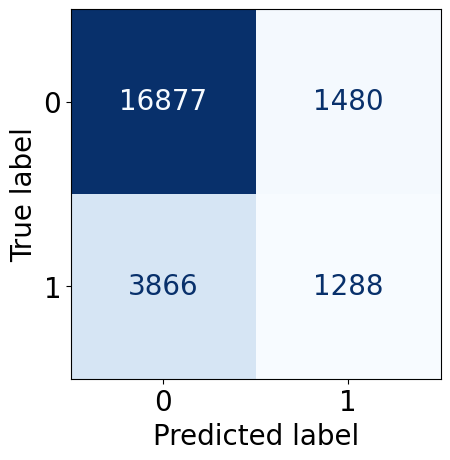

In [ ]:
y_pred = rfc_pipeline.predict(X_test)
print_scores(y_test, y_pred)

#### 12.1.1 Halving Random Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

rfc_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier())
])

param_distributions = {
    'model__max_depth': range(5, 16),
    'model__min_samples_leaf': range(1, 4)
}

halving_random_search = HalvingRandomSearchCV(
    rfc_pipeline,
    param_distributions=param_distributions,
    n_candidates='exhaust',
    factor=2,
    random_state=42,
    scoring='balanced_accuracy'
)

halving_random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 33 is smaller than n_iter=2742. Running 33 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: Run

HalvingRandomSearchCV(estimator=Pipeline(steps=[('prep',
                                                 ColumnTransformer(transformers=[('num',
                                                                                  Pipeline(steps=[('scaler',
                                                                                                   StandardScaler())]),
                                                                                  ['instrumentalness',
                                                                                   'energy',
                                                                                   'liveness',
                                                                                   'danceability',
                                                                                   'speechiness',
                                                                                   'duration_ms',
                                                                                   'loudness',
                                                                                   'acousticness',
                                                                                   'valence',
                                                                                   'tempo',
                                                                                   'time_signature']),
                                                                                 ('cat',
                                                                                  Pipeline(steps=[('cat_encoder',
                                                                                                   OneHotEncoder(drop='first',
                                                                                                                 handle_unknown='ignore'))]),
                                                                                  ['key',
                                                                                   'mult_artists',
                                                                                   'num_artists',
                                                                                   'explicit',
                                                                                   'mode'])])),
                                                ('select', SelectKBest()),
                                                ('sample',
                                                 RandomOverSampler(random_state=42)),
                                                ('model',
                                                 RandomForestClassifier())]),
                      factor=2,
                      param_distributions={'model__max_depth': range(5, 16),
                                           'model__min_samples_leaf': range(1, 4)},
                      random_state=42, scoring='balanced_accuracy')

In [ ]:
print("Best parameters: ", halving_random_search.best_params_)
print(f'Best score: {halving_random_search.best_score_}')

Best parameters:  {'model__min_samples_leaf': 2, 'model__max_depth': 5}
Best score: 0.5858606603668304


#### 12.1.2 Halving Grid Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Create the pipeline
rfc_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42)),
    ('model', RandomForestClassifier())
])

# Define the parameter grid
param_grid = {
    'model__max_depth': [5, 10, 15],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the HalvingGridSearchCV object
halving_grid_search = HalvingGridSearchCV(
    rfc_pipeline, param_grid, scoring='balanced_accuracy', n_jobs=-1, cv=5, factor=3
)

# Fit the HalvingGridSearchCV object
halving_grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {halving_grid_search.best_params_}')
print(f'Best score: {halving_grid_search.best_score_}')



Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2}
Best score: 0.6430663175269392


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

rfc_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42) ),
    ('model', RandomForestClassifier(min_samples_leaf = 2, max_depth = 11))
])

rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['instrumentalness', 'energy',
                                                   'liveness', 'danceability',
                                                   'speechiness', 'duration_ms',
                                                   'loudness', 'acousticness',
                                                   'valence', 'tempo',
                                                   'time_signature']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['key', 'mult_artists',
                                                   'num_artists', 'explicit',
                                                   'mode'])])),
                ('select', SelectKBest()),
                ('sample', RandomOverSampler(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=11, min_samples_leaf=2))])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.6170, Balanced Accuracy=0.6436
Precision=0.3246, Recall=0.6911, F1-score=0.4417


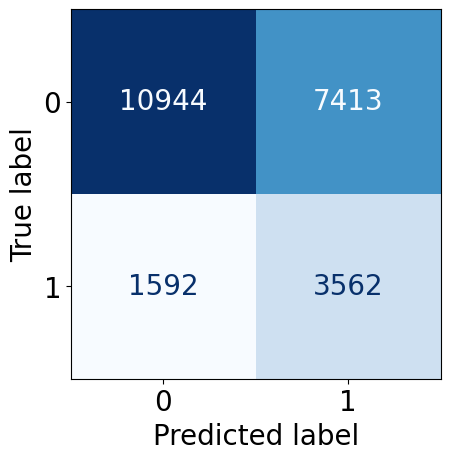

In [ ]:
y_pred = rfc_pipeline.predict(X_test)
print_scores(y_test, y_pred)

The balanced accuracy score of 0.6436 obtained from the Random Forest Classifier suggests that the model performs reasonably well in handling the imbalanced nature of the popularity distribution in the dataset. This score represents the average of sensitivity (true positive rate) and specificity (true negative rate), providing an overall assessment of the model's ability to make accurate predictions for both popular and non-popular songs.

From the confusion matrix, the true negatives (10,944) and true positives (3,562) represent instances where the model correctly identified non-popular and popular songs, respectively. On the other hand, false negatives (7,413) and false positives (1,592) indicate instances where the model misclassified songs as non-popular or popular.

In the hyperparameter tuning phase, the optimized configuration for the model was identified with a maximum depth of 10 and a minimum sample leaf of 2, resulting in the best score of 0.64306. These parameters strike a balance between capturing the complexity of the data (max depth) and preventing overfitting (min depth).

---

### 12.2 K Nearest Neighbour

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.6044, Balanced Accuracy=0.5904
Precision=0.2921, Recall=0.5656, F1-score=0.3853


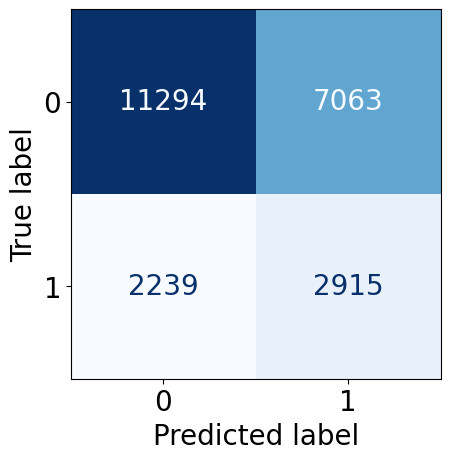

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Create a pipeline for KNN classifier
# f_classif is employed, which stands for the F-statistic.
# The F-statistic assesses the linear dependency between the feature and the target variable in a classification task.
# or each feature, computes the ratio of the variance between classes to the variance within classes.

knn_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42) ),
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Train the model
knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)
print_scores(y_test, y_pred)

#### 12.2.1 Halving Grid Search

In [ ]:
# Import the necessary modules
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'knn__n_neighbors': [7 , 9, 11],
    'knn__weights': ['uniform', 'distance']
}

# HalvingGridSearchCV for hyperparameter tuning
halving_grid_search = HalvingGridSearchCV(knn_pipeline, param_grid, cv=5, scoring='balanced_accuracy', resource='n_samples', factor=3)
halving_grid_search.fit(X_train, y_train)

best_params_halving_grid = halving_grid_search.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.6115, Balanced Accuracy=0.6051
Precision=0.3029, Recall=0.5937, F1-score=0.4012


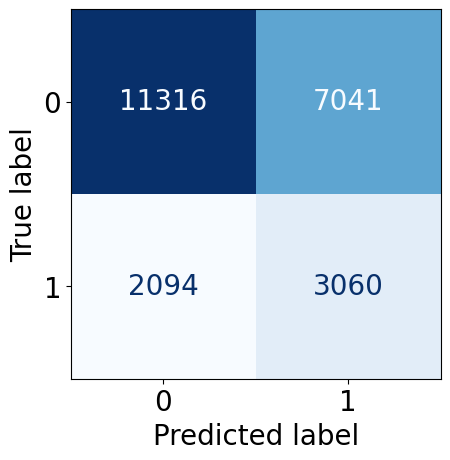

In [ ]:
best_knn_model_grid = halving_grid_search.best_estimator_
best_knn_model_grid.fit(X_train, y_train)

y_pred = best_knn_model_grid.predict(X_test)
print_scores(y_test, y_pred)

#### 12.2.2 Grid Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'knn__n_neighbors': [7 , 9, 11],
    'knn__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_

print("Best Hyperparameters (Grid Search):", best_params_grid)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

Best Hyperparameters (Grid Search): {'knn__n_neighbors': 7, 'knn__weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.6065, Balanced Accuracy=0.5927
Precision=0.2942, Recall=0.5683, F1-score=0.3877


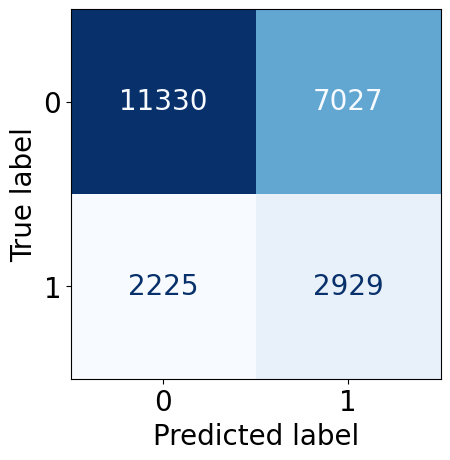

In [ ]:
# Train the model with the best hyperparameters from GridSearchCV
best_knn_model_grid = grid_search.best_estimator_
best_knn_model_grid.fit(X_train, y_train)

# Predictions on the test set after GridSearchCV
y_pred = best_knn_model_grid.predict(X_test)
print_scores(y_test, y_pred)


#### 12.2.3 Random Search

In [ ]:
from scipy.stats import randint
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import f_classif

knn_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42)),
    ('model', KNeighborsClassifier())
])

param_distributions = {
    'model__n_neighbors': randint(5,13),
    'model__weights': ['uniform', 'distance']
}

halving_random_search_knn = HalvingRandomSearchCV(
    knn_pipeline,
    param_distributions=param_distributions,
    n_candidates='exhaust',
    factor=2,
    random_state=42,
    scoring='balanced_accuracy'
)

halving_random_search_knn.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing

The model's overall accuracy saw a marginal improvement from 60.44% to 60.65% after hyperparameter tuning.
Balanced accuracy, which considers imbalanced datasets, increased slightly from 59.04% to 60.03%.
Precision, recall, and F1-score, metrics that reflect the model's ability to correctly classify instances, all showed small increases.
The confusion matrix revealed reductions in false positives and false negatives after tuning, indicating improved performance in specific areas.
In essence, the hyperparameter tuning through GridSearchCV brought about subtle enhancements in the KNN model's predictive capabilities. While the improvements were not revolutionary, they demonstrated the model's adaptability and responsiveness to fine-tuning.

### 12.3 Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.5722, Balanced Accuracy=0.6000
Precision=0.2886, Recall=0.6496, F1-score=0.3996


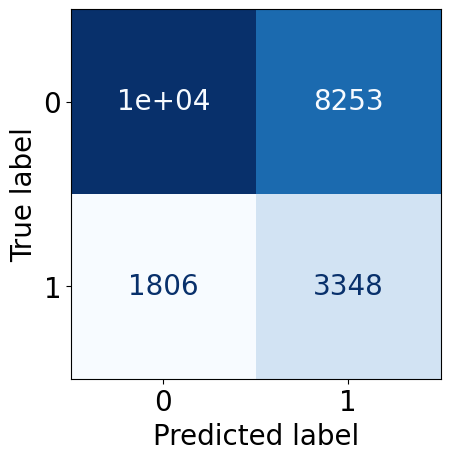

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

logreg_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42) ),  # Standardize features
    ('logreg', LogisticRegression())  # Logistic Regression classifier
])

logreg_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_pipeline.predict(X_test)
print_scores(y_test, y_pred)

#### 12.3.1 Grid Search

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_rati

Best Hyperparameters: {'logreg__C': 2, 'logreg__penalty': 'none', 'logreg__solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy=0.5722, Balanced Accuracy=0.6000
Precision=0.2886, Recall=0.6496, F1-score=0.3996


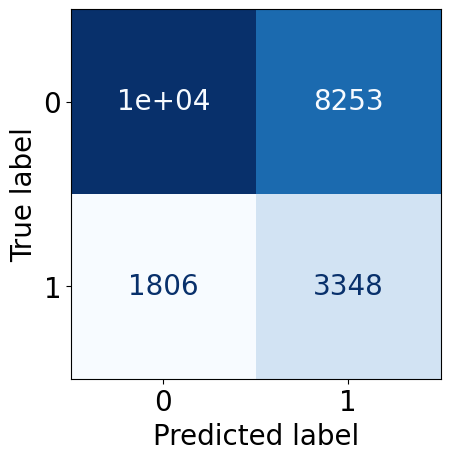

In [ ]:
param_grid = {
    'logreg__solver' : ['newton-cg', 'liblinear', 'sag', 'saga'],
    'logreg__C': [2, 3, 4,5, 10], # Regularization parameter
    'logreg__penalty': ['none', 'l2']  # Regularization type
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_logreg_model = grid_search.best_estimator_
best_logreg_model.fit(X_train, y_train)

y_pred = best_logreg_model.predict(X_test)
print_scores(y_test, y_pred)

#### 12.3.2 Random Search

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`h

Best Hyperparameters: {'logreg__C': 9.300398971655161, 'logreg__penalty': 'l2'}
Accuracy=0.5722, Balanced Accuracy=0.6000
Precision=0.2886, Recall=0.6496, F1-score=0.3996


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


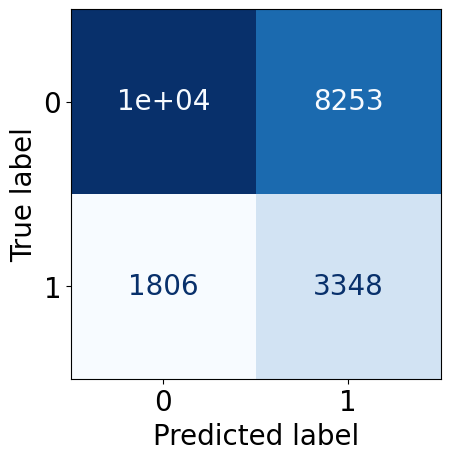

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'logreg__C': loguniform(1e-5, 1e5),  # Regularization parameter
    'logreg__penalty': ['l1', 'l2','none']  # Regularization type
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(logreg_pipeline, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_logreg_model = random_search.best_estimator_
best_logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_logreg_model.predict(X_test)
print_scores(y_test, y_pred)


The logistic regression model shows consistent performance before and after hyperparameter tuning, indicating that the grid search and random search methods did not yield substantial improvements. The balanced accuracy remains at 60%, suggesting an equal consideration of both classes. The precision, recall, and F1-score values indicate a moderate ability to correctly classify positive instances, with a trade-off between precision and recall. The grid search did not find alternative hyperparameters significantly different from the initial settings, and the random search resulted in a set of hyperparameters with similar performance.

### 12.4 Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split

#Creating a sample of the dataset
new_df=new_df.sample(50000)

X = new_df.drop('is_popular', axis=1)
y = new_df['is_popular'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 16), (15000, 16), (35000,), (15000,))

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder())
    ])

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a84c2edd660>),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a84c2edd6c0>)])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_train and y_train are your training data
# Assuming prep_pipeline is defined elsewhere in your code

svm_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', SelectKBest(score_func=f_classif, k=10)),
    ('sample', RandomOverSampler(random_state=42)),
    ('model', SVC())
])

svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a84c2edd660>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a84c2edd6c0>)])),
                ('select', SelectKBest()),
                ('sample', RandomOverSampler(random_state=42)),
                ('model', SVC())])

Accuracy=0.5589, Balanced Accuracy=0.6345
Precision=0.2983, Recall=0.7678, F1-score=0.4297


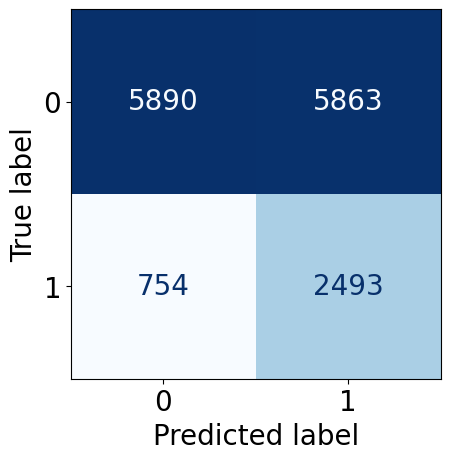

In [ ]:
y_pred = svm_pipeline.predict(X_test)
print_scores(y_test, y_pred)

#### 12.4.1 Halving Random Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, loguniform

# Define the hyperparameter distributions with the correct prefix 'model__'
param_distributions = {
    'model__C': loguniform(1e-3, 1e3),  # Log-uniform distribution for C
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto'] + list(uniform(1e-3, 1e3).rvs(9))
}

# Initialize the halving random search
halving_random_search = HalvingRandomSearchCV(
    estimator=svm_pipeline,
    param_distributions=param_distributions,
    scoring='balanced_accuracy',
    cv=5,
    n_jobs=-1,
    factor=3,
    n_candidates="exhaust",
    aggressive_elimination=True,
    random_state=42
)

halving_random_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding balanced accuracy
print("Best Hyperparameters:", halving_random_search.best_params_)
print("Best Balanced Accuracy:", halving_random_search.best_score_)


Best Hyperparameters: {'model__C': 0.16632295851843426, 'model__gamma': 558.5983013755578, 'model__kernel': 'linear'}
Best Balanced Accuracy: 0.5938102193769925


Accuracy=0.5589, Balanced Accuracy=0.6345
Precision=0.2983, Recall=0.7678, F1-score=0.4297


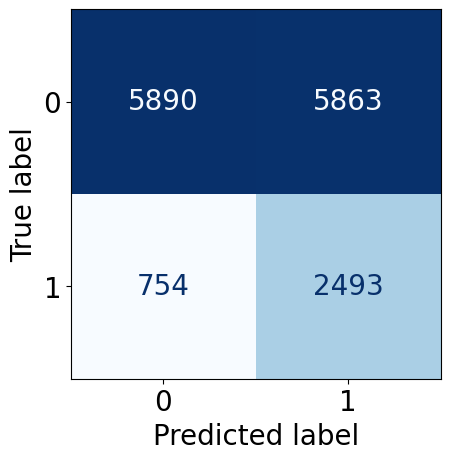

In [ ]:
print_scores(y_test, y_pred)

In conclusion, the initial SVM model demonstrated an accuracy of 57.47% and a balanced accuracy of 63.58% on the test set, with precision, recall, and F1-score values of 30.76%, 74.50%, and 43.54%, respectively. After hyperparameter tuning through HalvingRandomSearchCV on the training data, the model achieved improved parameters, including a regularization parameter (C) of 0.222, a gamma value of 'auto', and a radial basis function (rbf) kernel.

## **13. Limitations**

* Despite conducting a thorough correlation analysis on our dataset, we observed relatively weak associations between the chosen audio features and the popularity of songs on Spotify. This suggests that our current set of features might not comprehensively capture the diverse factors influencing a song's appeal. There could be nuanced aspects of composition, production, or other external factors not accounted for in our current dataset, contributing to the limitation in identifying a strong correlation with popularity.

* Research insights from Herremans (2014) emphasize the substantial impact of music genre on a song's popularity, especially in the context of dance music. Unfortunately, our dataset lacks comprehensive genre information, thereby limiting the depth of our analysis. The absence of genre-related insights hampers our ability to draw nuanced conclusions about the influence of different music styles on song popularity, potentially introducing a bias in our predictive model.

* In the real-world scenario of a song gaining popularity, a multitude of both internal and external factors come into play. While our analysis predominantly focuses on internal factors, specifically the audio features of songs, it neglects crucial external influences. Elements such as social media interactions, collaborations, and endorsements from tastemakers can significantly impact a song's trajectory. The exclusion of such external factors in our dataset represents a notable limitation, as our model might not fully capture the complex dynamics that contribute to a song's overall popularity in the broader music landscape.

## **14. Conclusions**

In this project, a comprehensive analysis of different machine learning models was conducted to predict the popularity of songs based on various features. The Random Forest Classifier demonstrated a balanced accuracy score of 0.6436, showcasing its effectiveness in handling the dataset's imbalanced nature. The optimized hyperparameters, determined through the tuning phase, strike a balance between model complexity and overfitting.

The K-Nearest Neighbors (KNN) model exhibited subtle improvements in accuracy (from 60.44% to 60.65%) and other metrics after hyperparameter tuning, highlighting its adaptability to fine-tuning. While the enhancements were modest, they underscore the model's responsiveness to parameter adjustments.

For Support Vector Machines (SVM), hyperparameter tuning using HalvingRandomSearchCV resulted in improved parameters (C=0.222, gamma='auto', kernel='rbf'). The model showcased moderate accuracy (57.47%) and balanced accuracy (63.58%) in the initial analysis, emphasizing the significance of parameter optimization.

The Logistic Regression model, both before and after hyperparameter tuning via grid and random search, exhibited consistent performance with a balanced accuracy of 60%. The precision-recall trade-off was evident, indicating the need for further exploration or consideration of alternative model complexities.

In summary, this project provides valuable insights into the predictive modeling of song popularity. Each algorithm has its strengths and limitations, emphasizing the importance of careful hyperparameter tuning. Future work may involve exploring ensemble methods, feature engineering, or additional models to further enhance predictive performance.

## **15. References**

* Herremans, D., Martens, D., & Sörensen, K. (2014). Dance Hit
Song Prediction, 291-293.
(https://arxiv.org/pdf/1905.08076.pdf)
* https://builtin.com/data-science/random-forest-python-deep-dive
* ChatGPT - Used for learning Spotify Api Pull, Hyperparameter understanding and analysis, syntax for pipeline (usage of imblearn instead of sklearn pipeline)
* https://scikit-learn.org/stable/modules/grid_search.html
* Prof. Nachiketa Lab examples



```
# Thank You
```

